Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [2]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.metrics import classification_report

In [3]:
fraud = pd.read_csv('C:/Users/Ashwini/Desktop/ExcelRAssignments/Decision Tree/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud.shape

(600, 6)

In [6]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud.isna()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [9]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

#### Visualisation

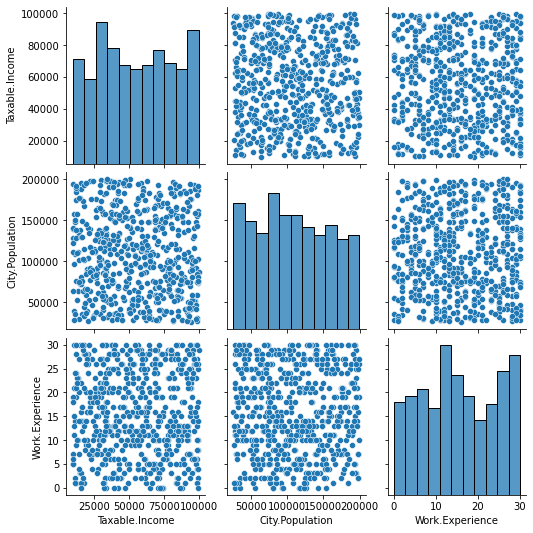

In [10]:
import seaborn as sns 
sns.pairplot(fraud)

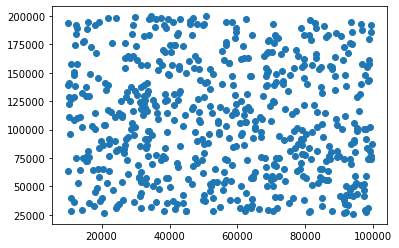

In [11]:
import matplotlib.pyplot as plt
plt.scatter(fraud['Taxable.Income'], fraud['City.Population'])

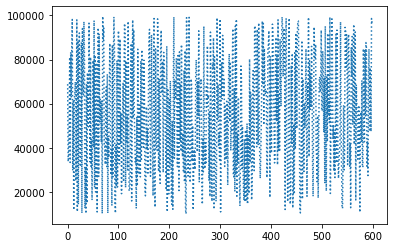

In [12]:
plt.plot(fraud['Taxable.Income'], linestyle = 'dotted')
plt.show()

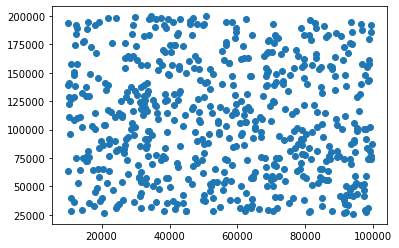

In [13]:
plt.scatter(fraud['Taxable.Income'], fraud['City.Population'])
plt.show()

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

In [15]:
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES
596,1,Divorced,69967,55369,2,YES
597,0,Divorced,47334,154058,0,YES
598,1,Married,98592,180083,17,NO


In [16]:
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,YES
1,1,0,33700,134075,18,YES
2,0,1,36925,160205,30,YES
3,1,2,50190,193264,15,YES
4,0,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,0,76340,39492,7,YES
596,1,0,69967,55369,2,YES
597,0,0,47334,154058,0,YES
598,1,1,98592,180083,17,NO


In [17]:
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban']) 
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [18]:
fraud['Target'] = pd.cut(fraud['Taxable.Income'], bins=[10003, 30000 ,99619], labels=['Risky', 'Good'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [19]:
fraud1 = fraud.drop('Taxable.Income', axis = 1)

In [20]:
fraud1['Target'] = label_encoder.fit_transform(fraud['Target']) 
fraud1['Target']

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

### Random Forest Classification 

In [21]:
X= fraud1.loc[:, fraud1.columns != "Target"]
Y= fraud1['Target']

In [22]:
num_trees = 40
max_features = 3
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees,
                               max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7616666666666667


### Bagged Decision Trees for Classification

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


seed = 7
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart,
                          n_estimators=num_trees,
                          random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.74


### AdaBoost Classification

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7816666666666666
